In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
907,2020-07-07,United Kingdom,286431.0,285768.0,44345.0,44236.0,663.0,109.0
908,2020-07-07,Germany,196891.0,196944.0,9028.0,9024.0,-53.0,4.0
909,2020-07-07,Iran,243596.0,243051.0,11708.0,11731.0,545.0,-23.0
910,2020-07-07,Turkey,206845.0,206844.0,5244.0,5241.0,1.0,3.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2771.3004385964914
RMSE =  6791.551999462531


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  311.327850877193
RMSE =  715.875421786182


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  13914.280898876405
RMSE =  17975.837184485903
-- World performances for deaths --
MAE =  1592.7977528089887
RMSE =  1933.2343656058752


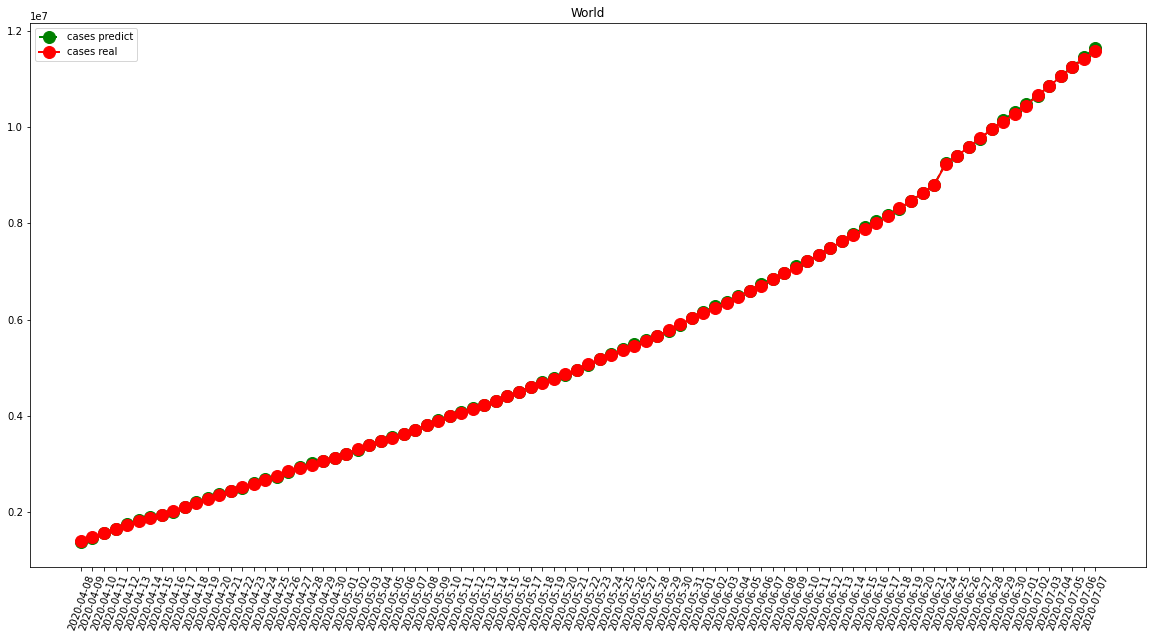

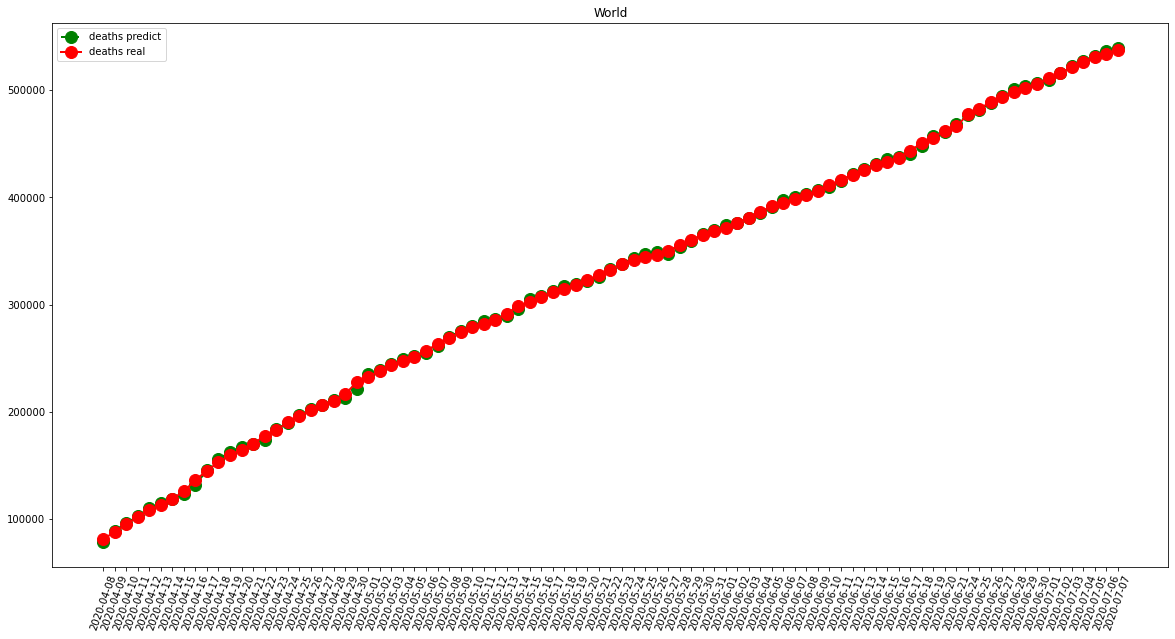

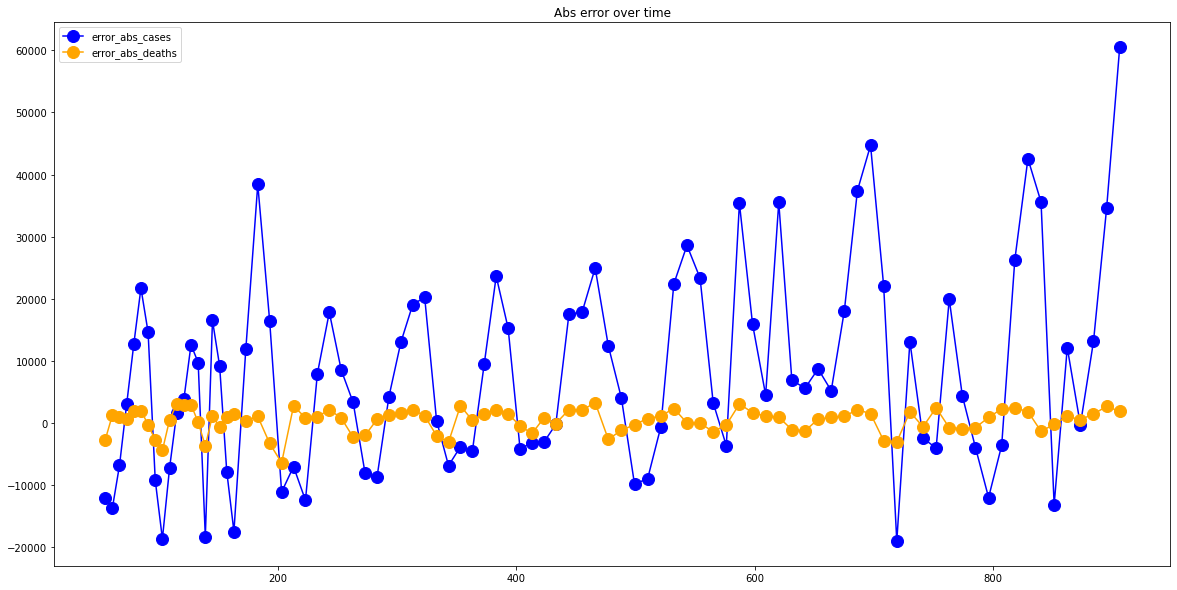

In [7]:
visShow("World")

-- France performances for cases --
MAE =  883.6666666666666
RMSE =  1455.61943147683
-- France performances for deaths --
MAE =  178.2828282828283
RMSE =  336.639092780204


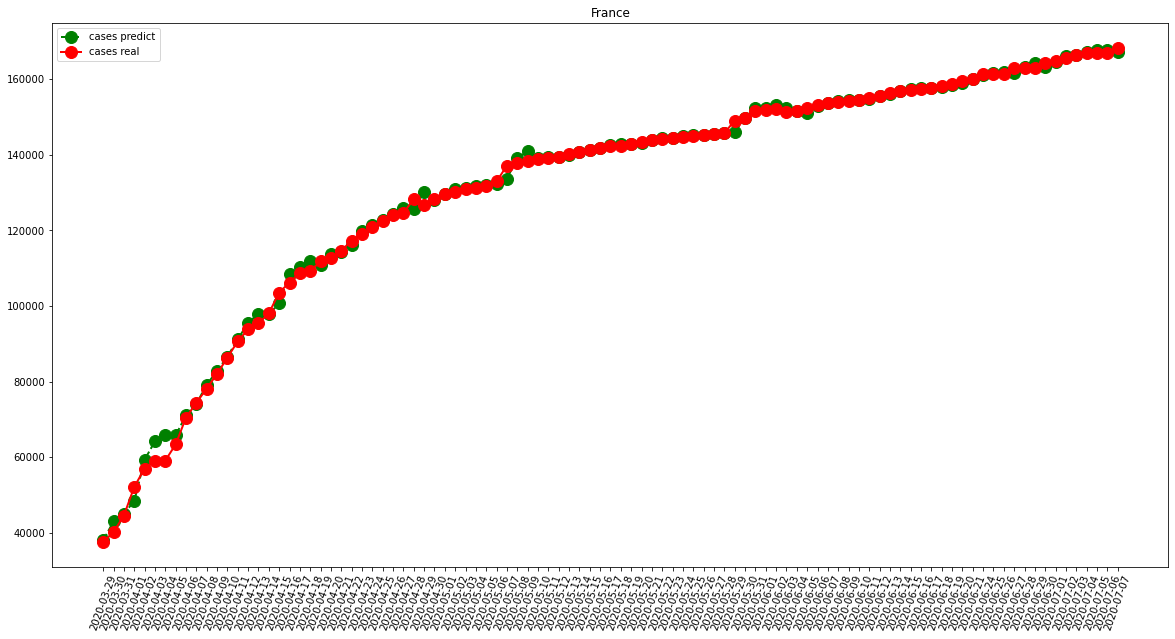

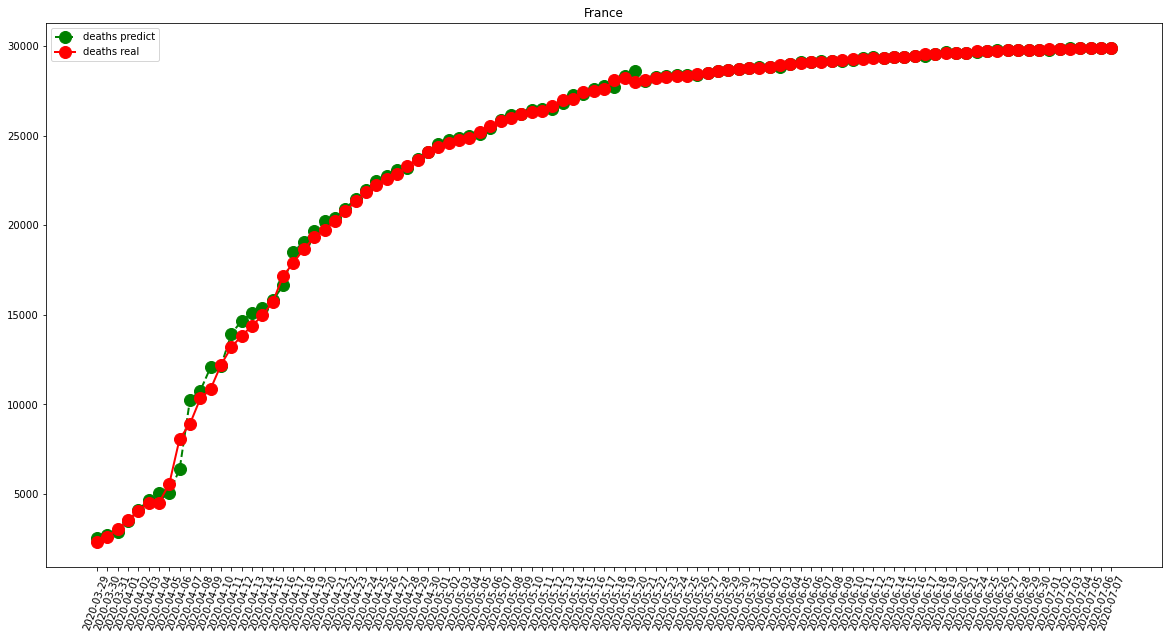

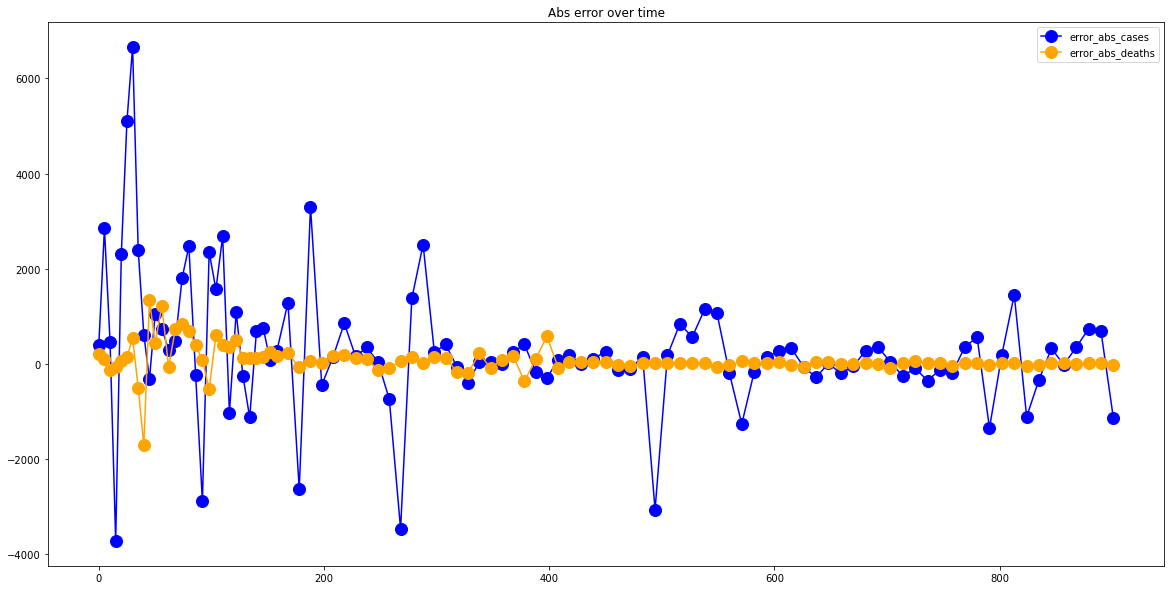

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  374.2121212121212
RMSE =  544.9244874014169
-- Italy performances for deaths --
MAE =  98.4040404040404
RMSE =  297.2191314858654


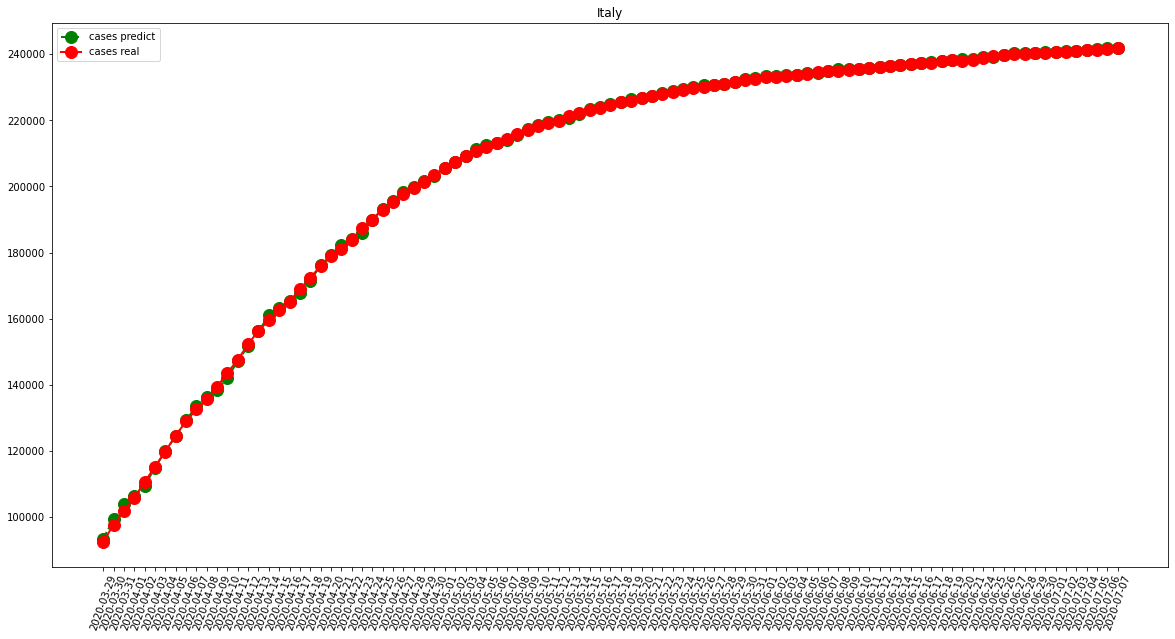

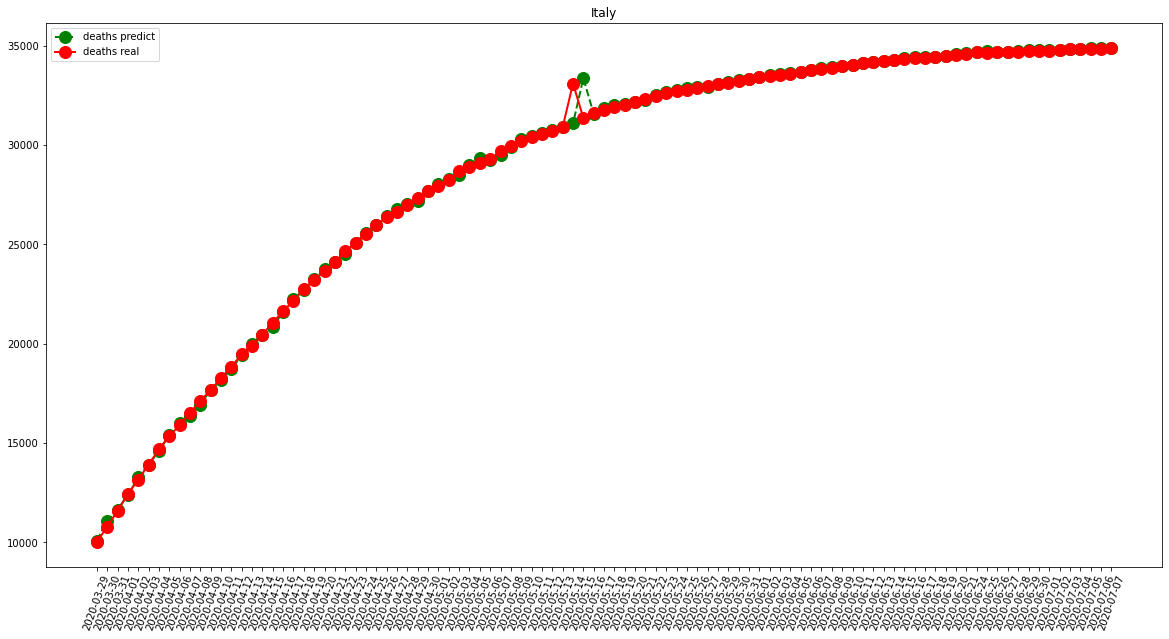

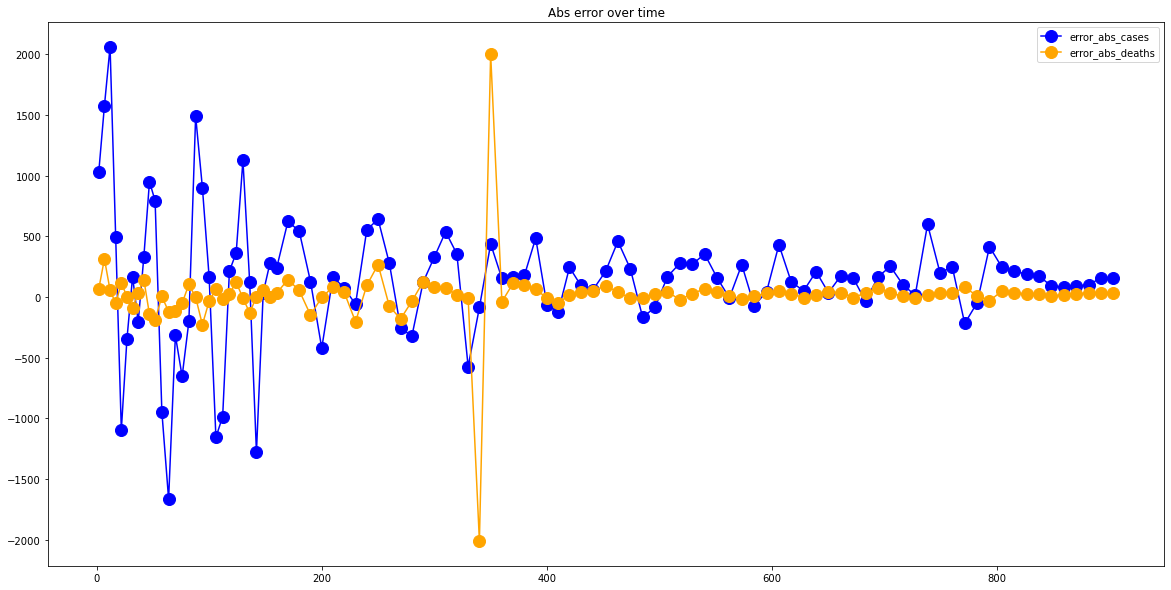

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  858.8484848484849
RMSE =  2058.5107934787925
-- Spain performances for deaths --
MAE =  183.14141414141415
RMSE =  407.92682300786856


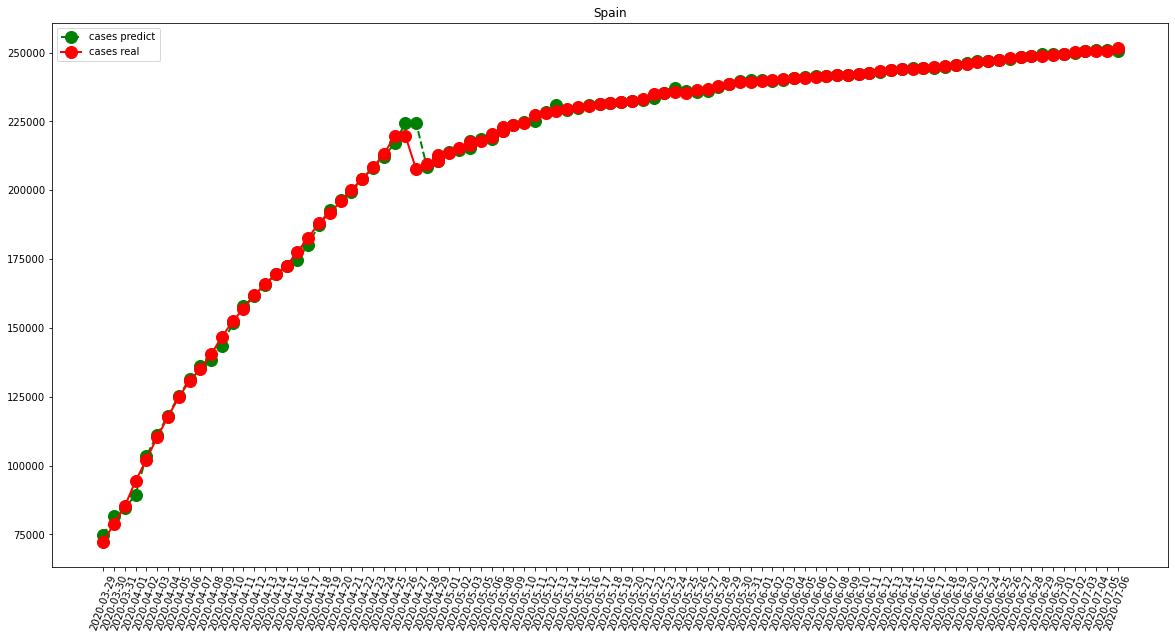

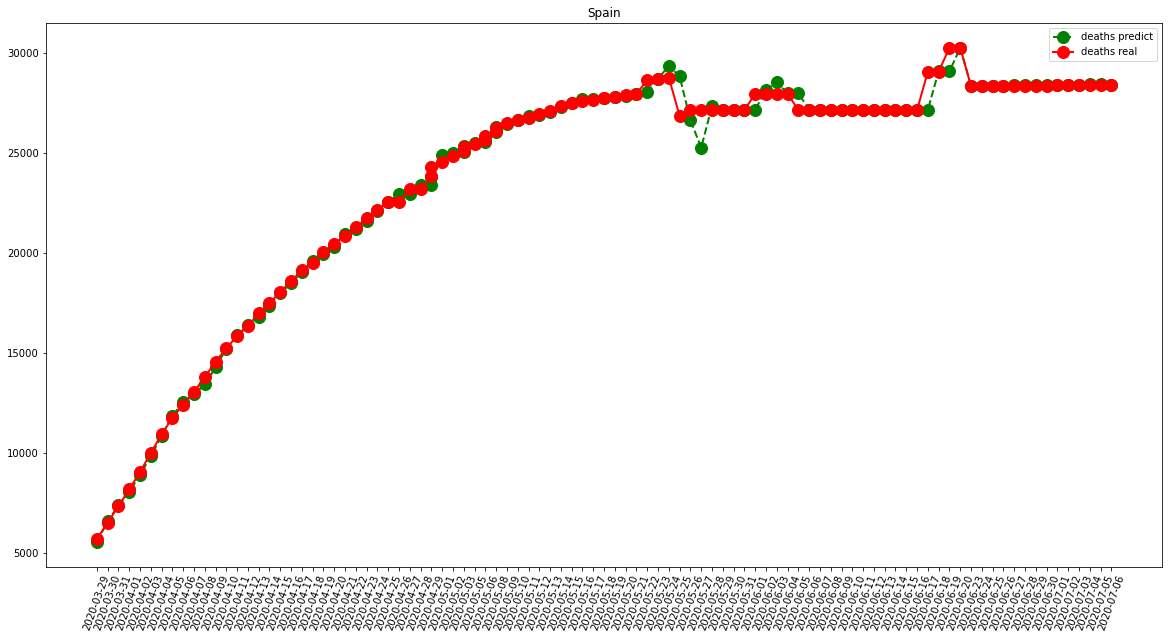

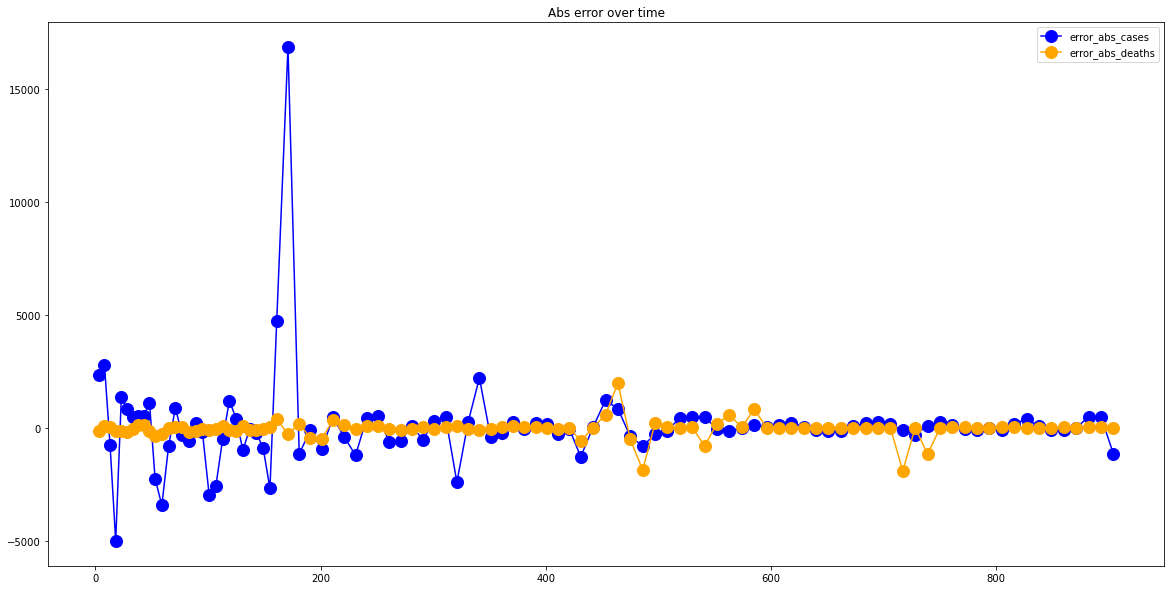

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  4823.232323232323
RMSE =  6609.611179138598
-- United States performances for deaths --
MAE =  536.9191919191919
RMSE =  783.3928990892337


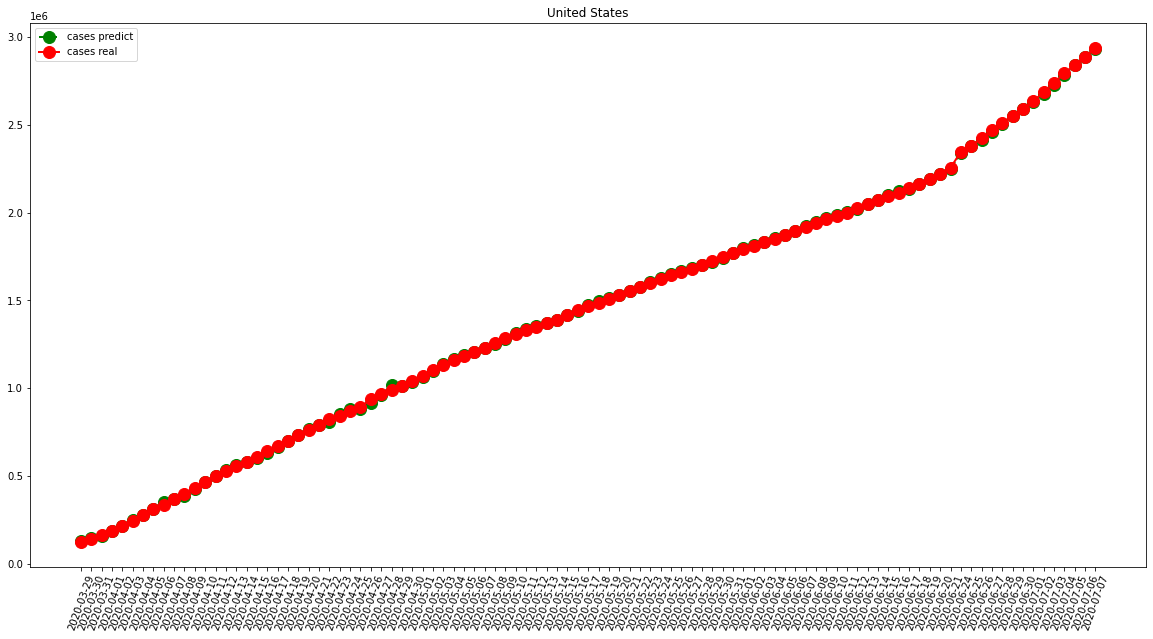

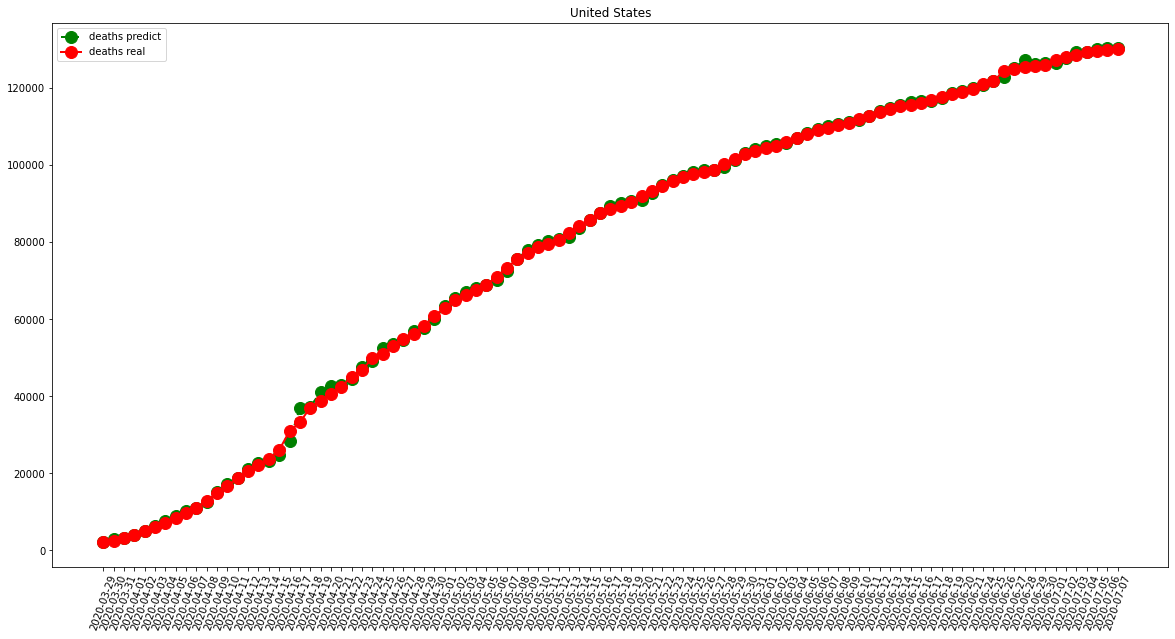

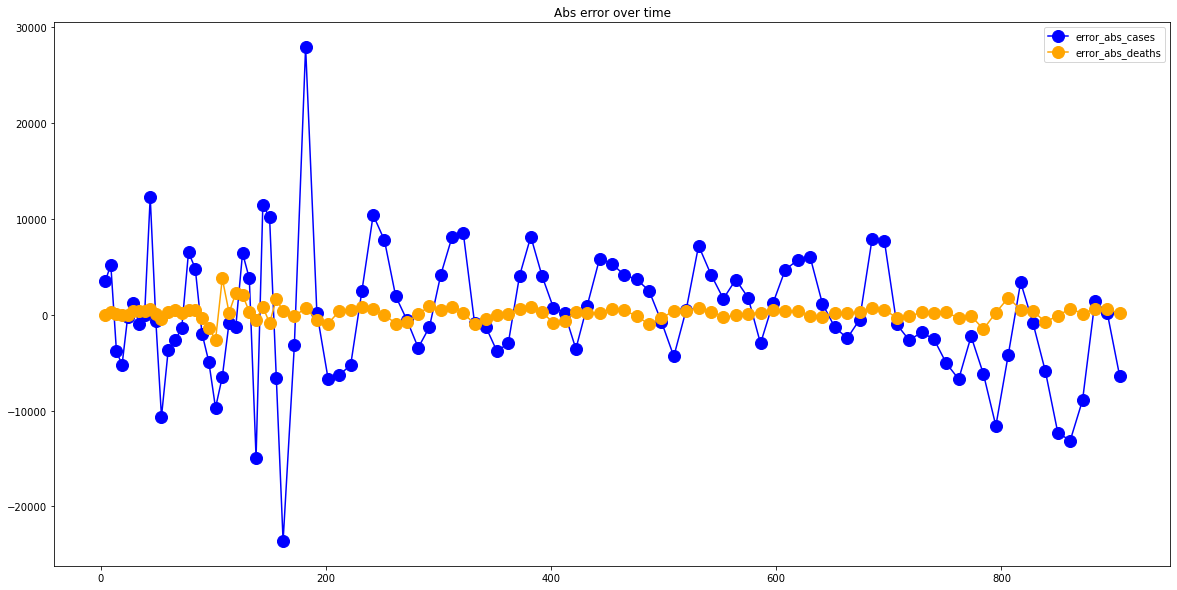

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  89.74747474747475
RMSE =  118.40970646808726
-- China performances for deaths --
MAE =  38.72727272727273
RMSE =  157.73933234833018


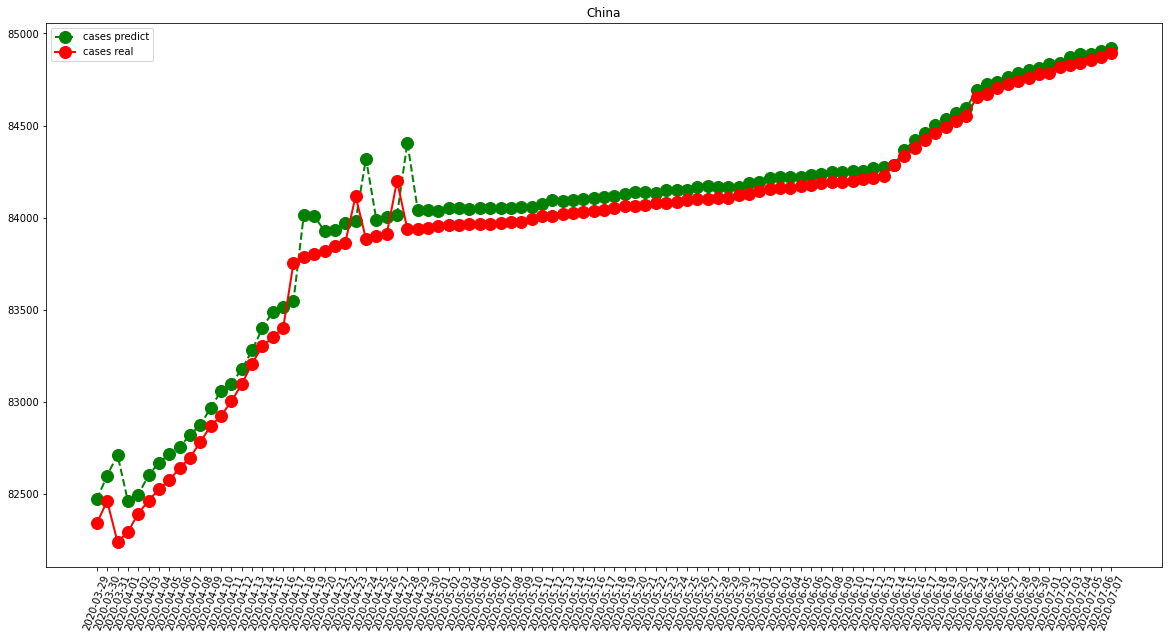

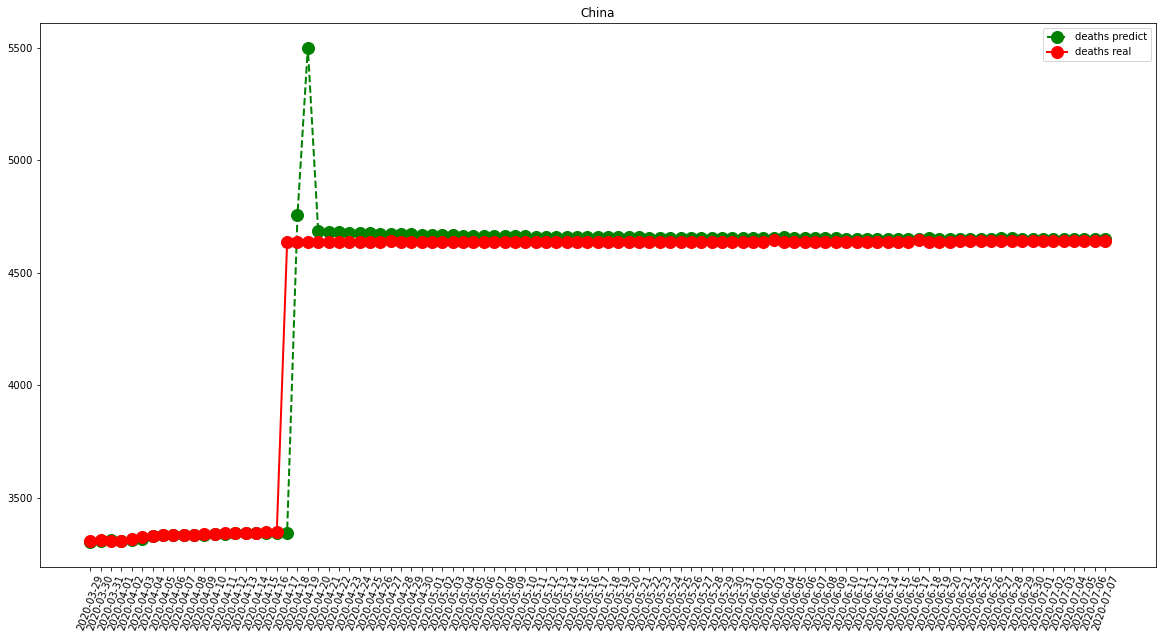

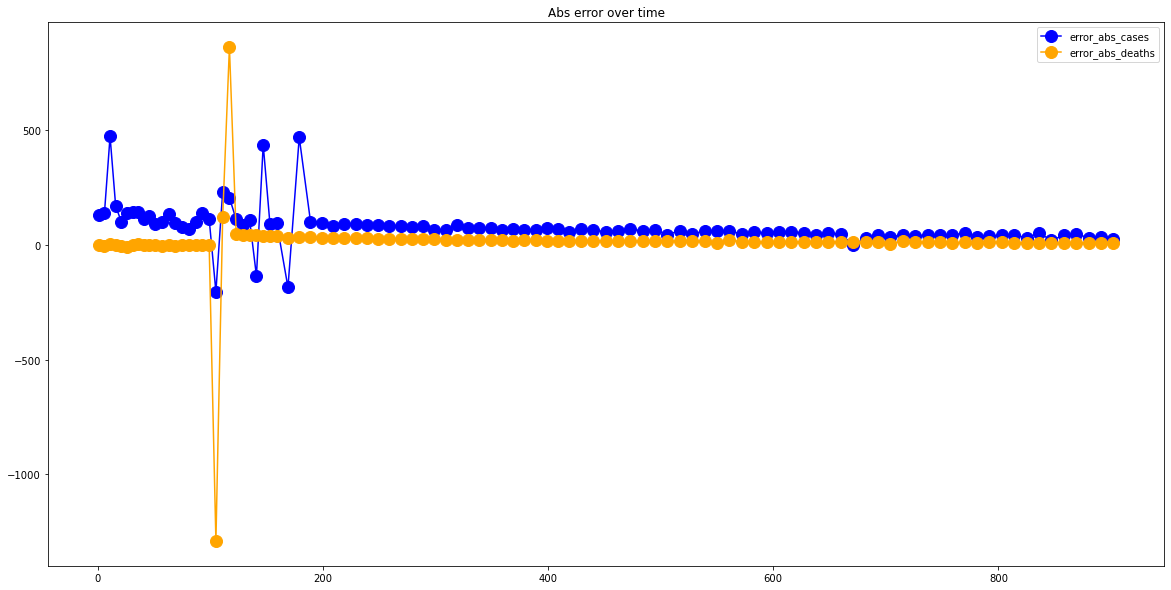

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1613.4084507042253
RMSE =  4948.628434251423
-- United Kingdom performances for deaths --
MAE =  246.2112676056338
RMSE =  580.3871097664891


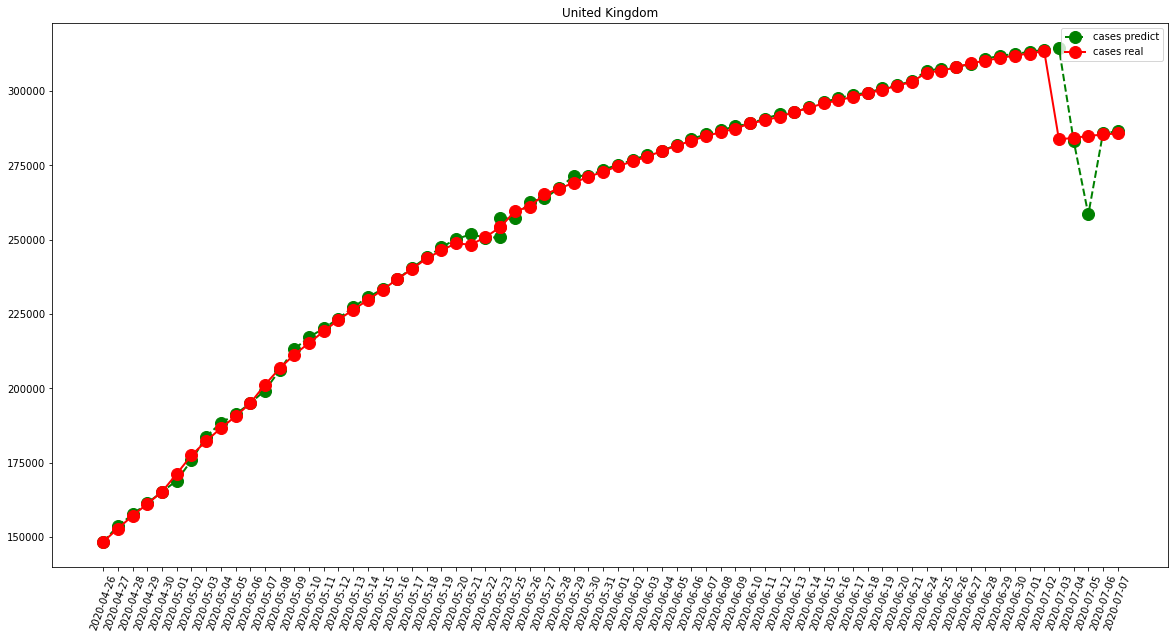

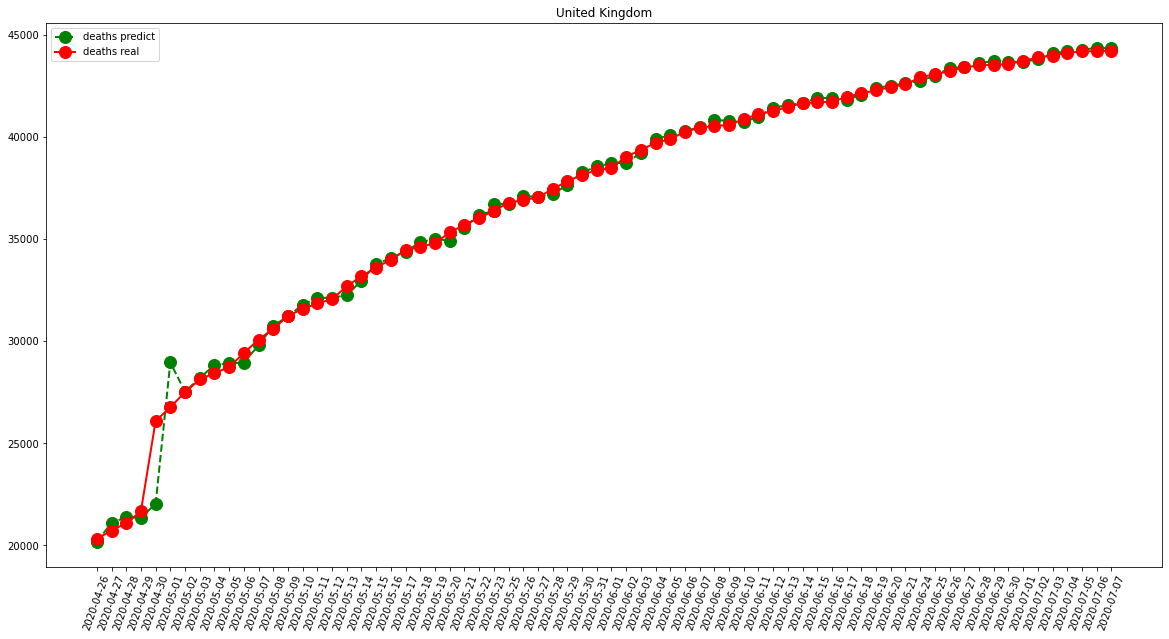

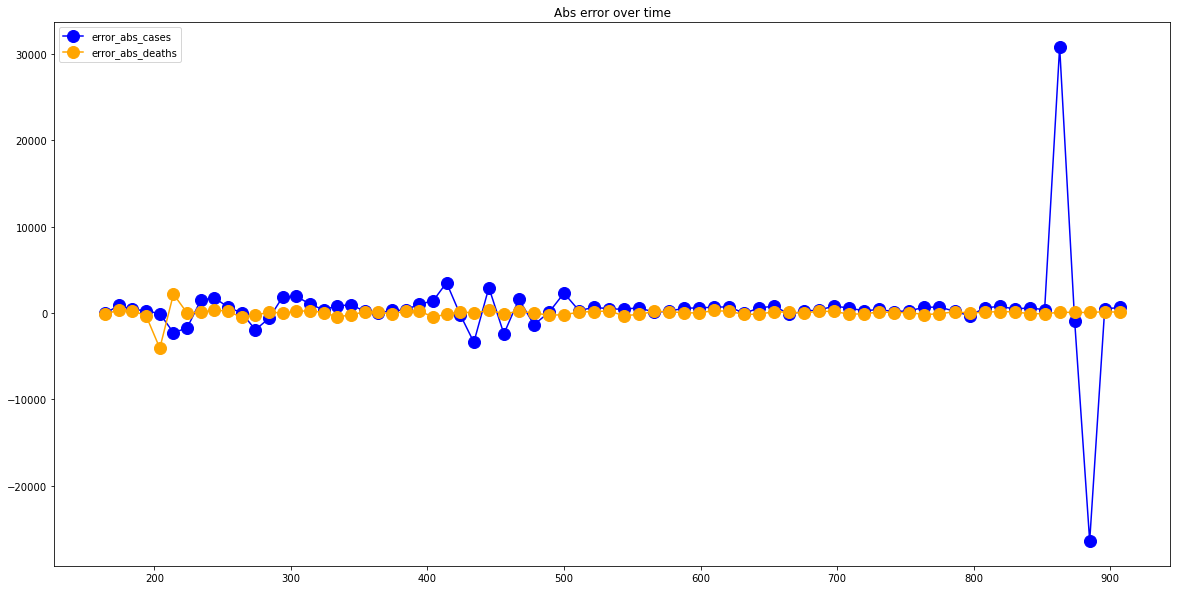

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  310.71830985915494
RMSE =  439.3253310234606
-- Germany performances for deaths --
MAE =  31.338028169014084
RMSE =  51.59252593539461


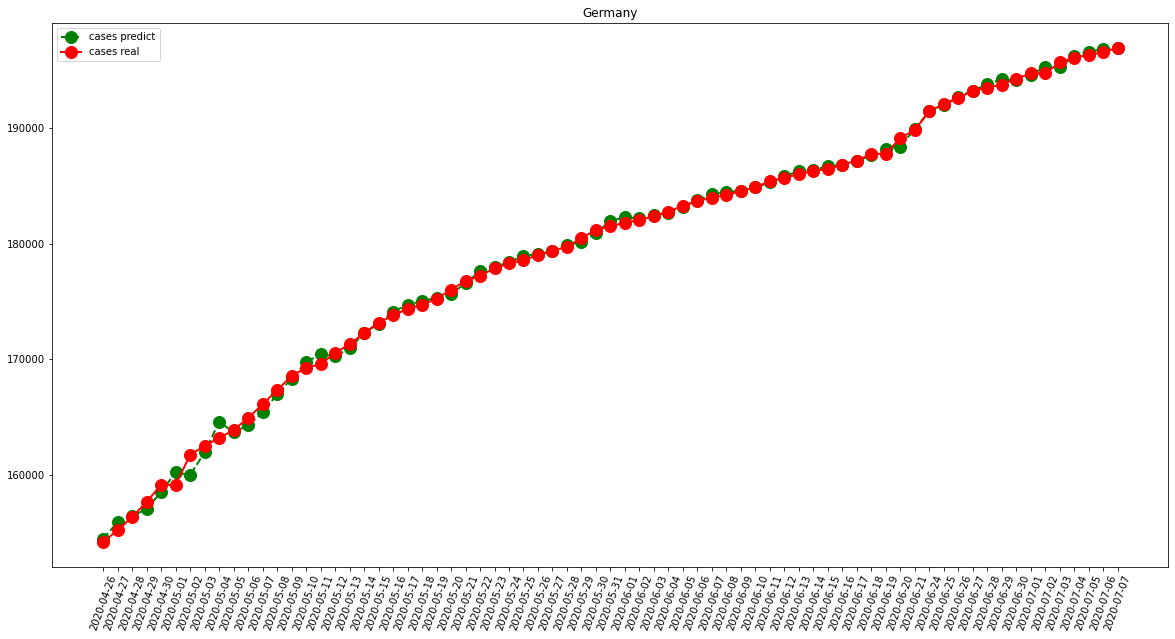

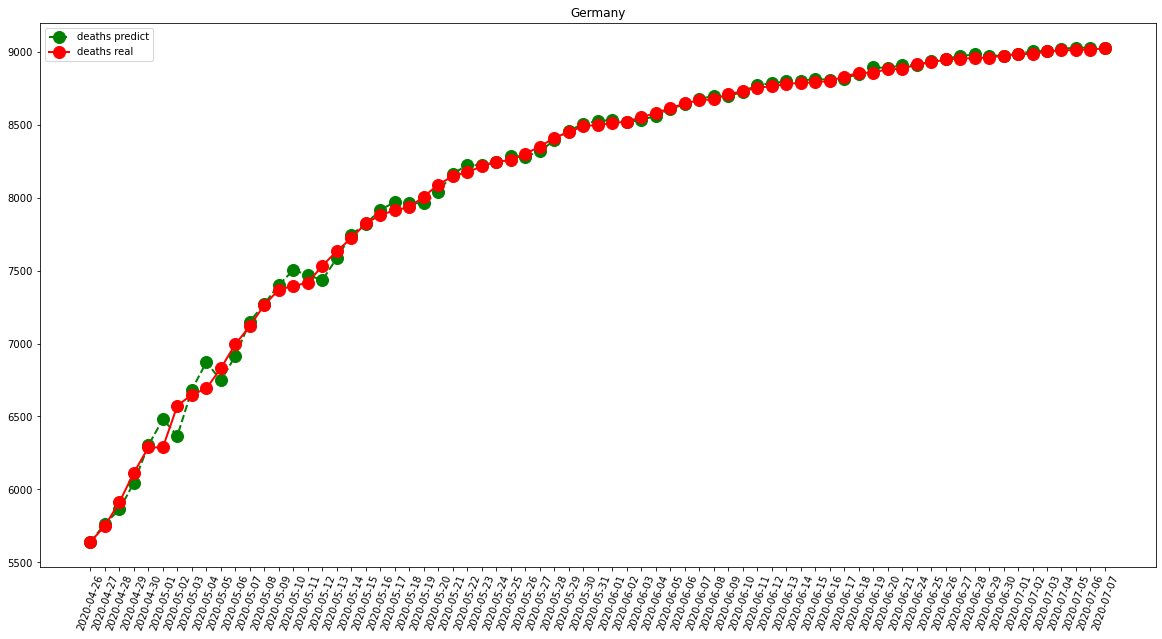

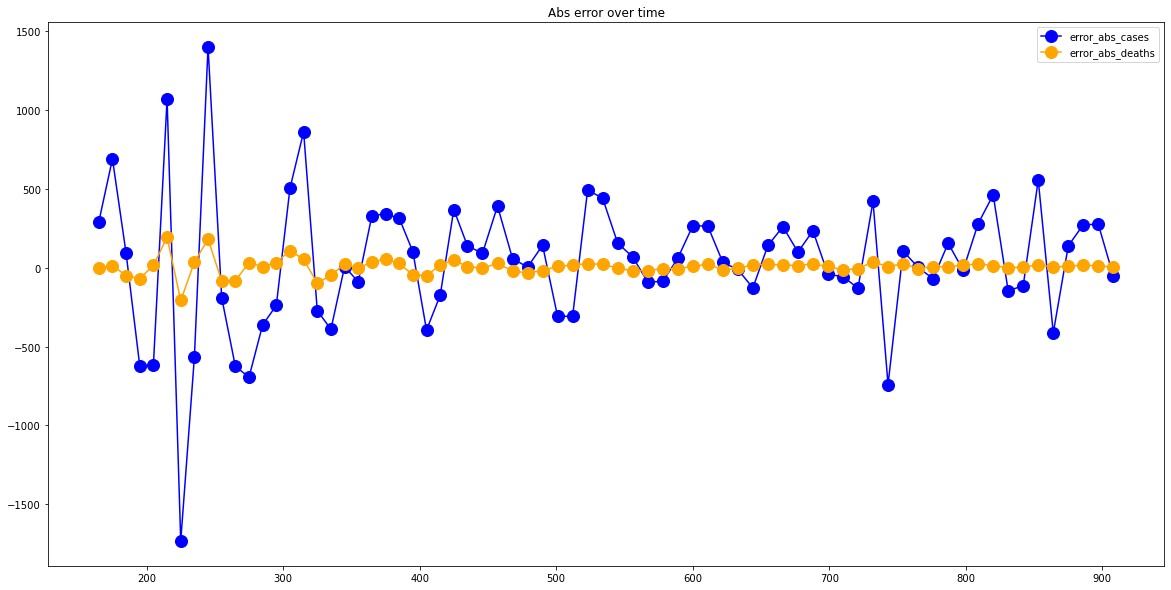

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  294.5492957746479
RMSE =  372.4115737751582
-- Iran performances for deaths --
MAE =  17.87323943661972
RMSE =  29.124066810897716


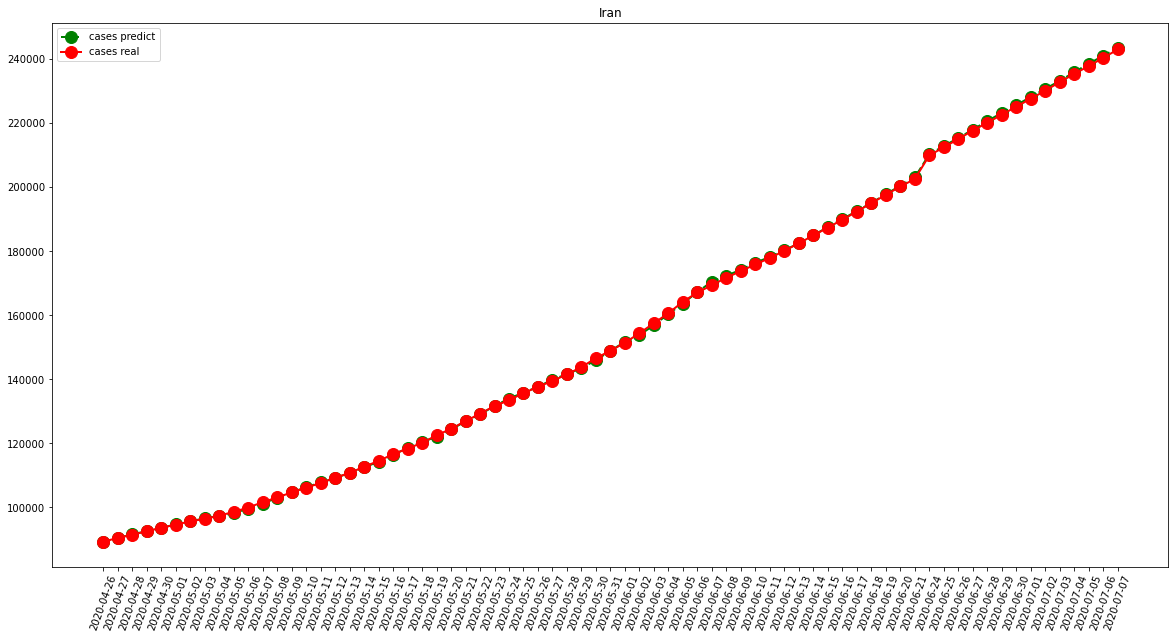

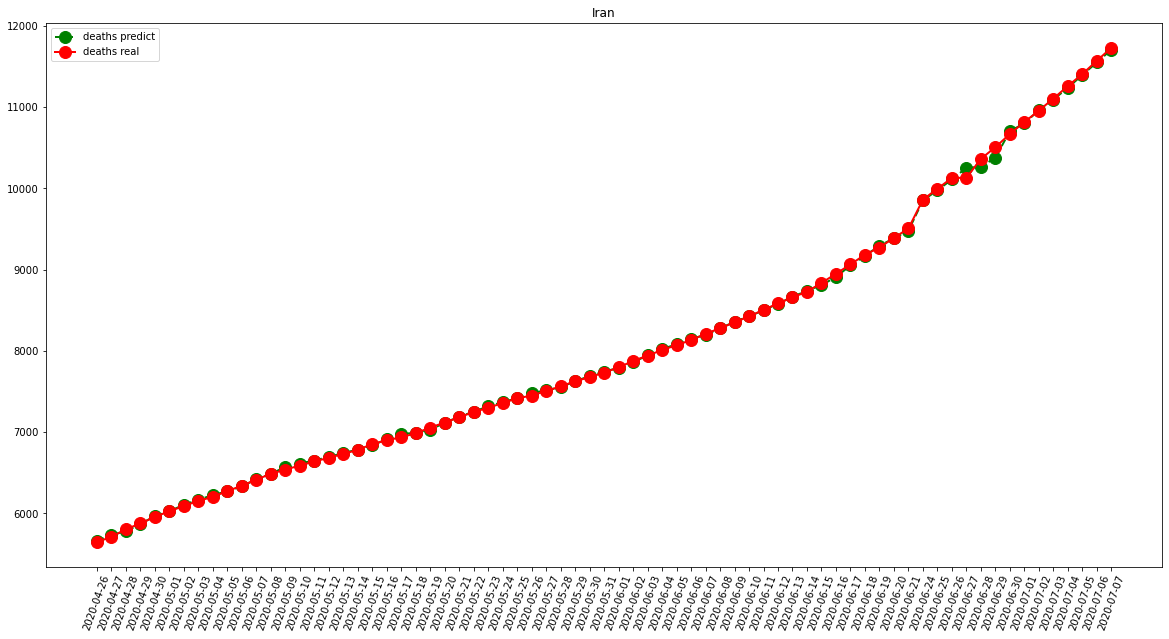

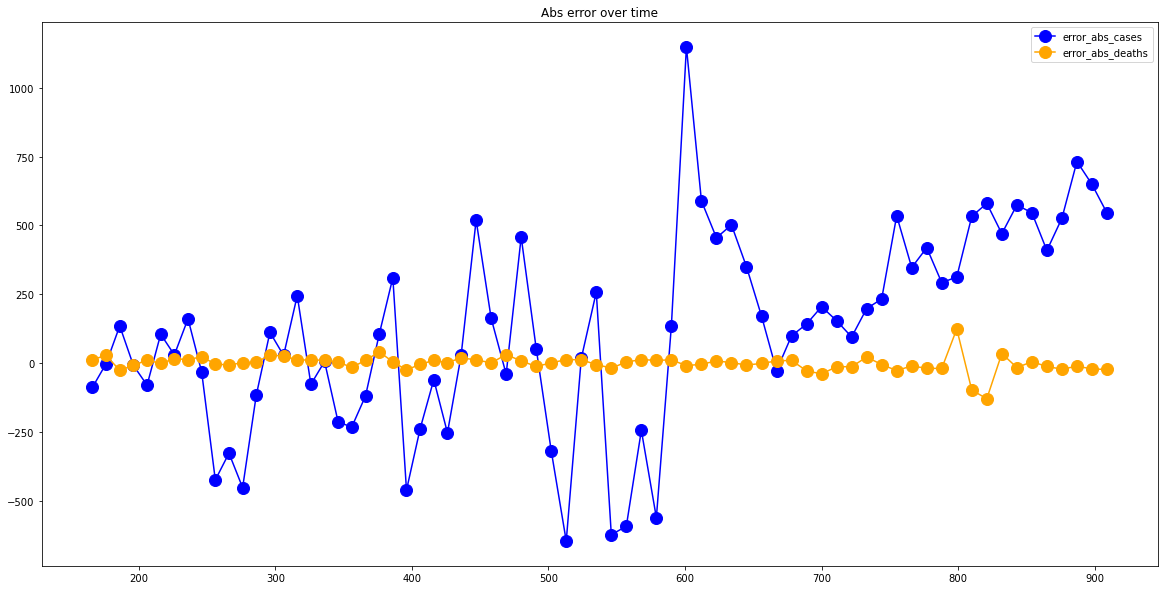

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  262.28169014084506
RMSE =  407.4845197094203
-- Turkey performances for deaths --
MAE =  25.887323943661972
RMSE =  120.46050138682887


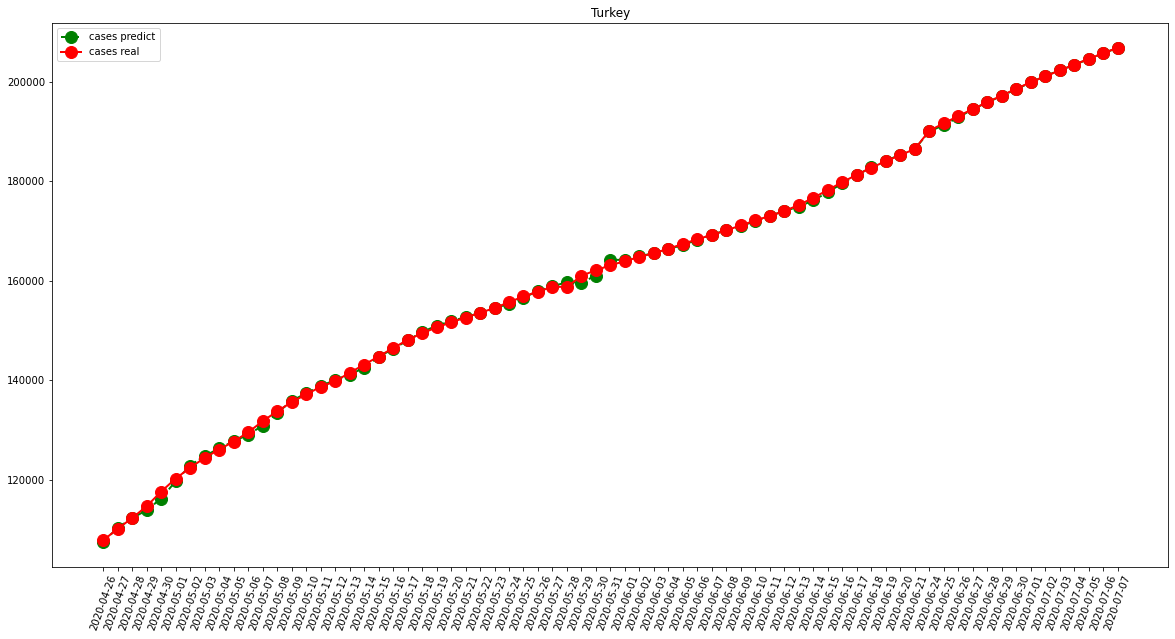

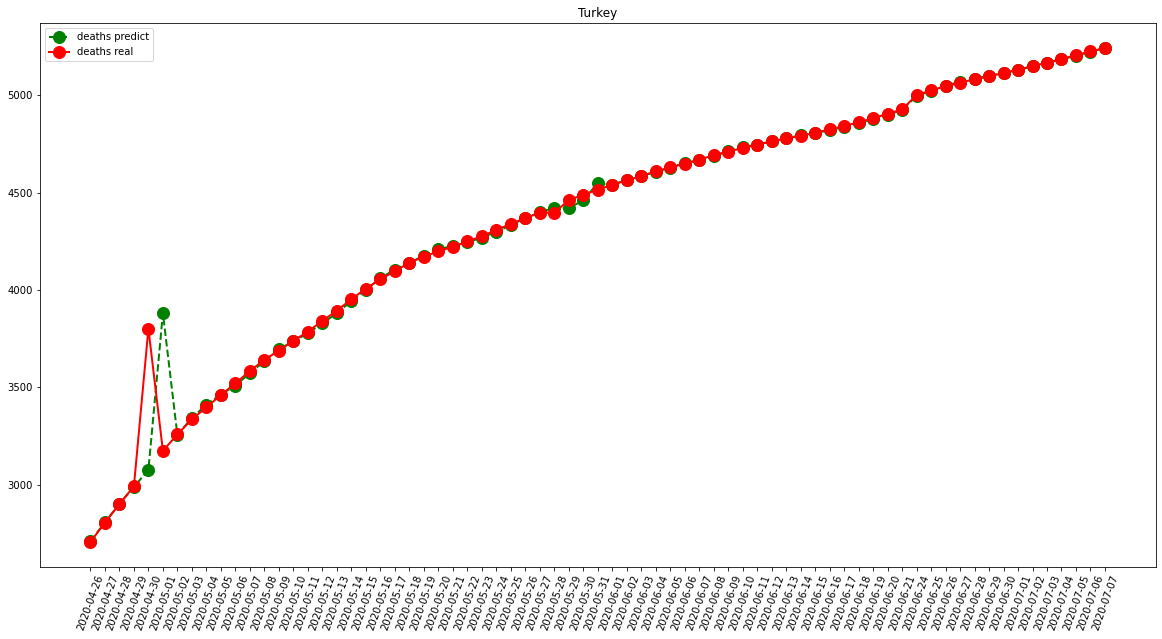

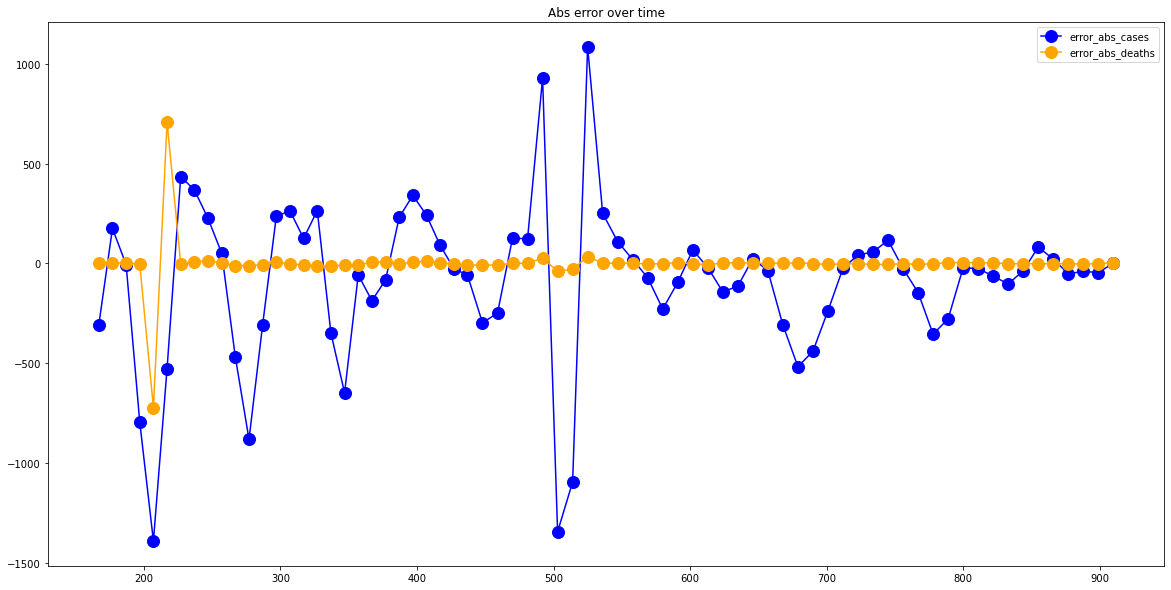

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  9476.5
RMSE =  12199.485644895034
-- Brazil performances for deaths --
MAE =  382.8863636363636
RMSE =  474.26409501266465


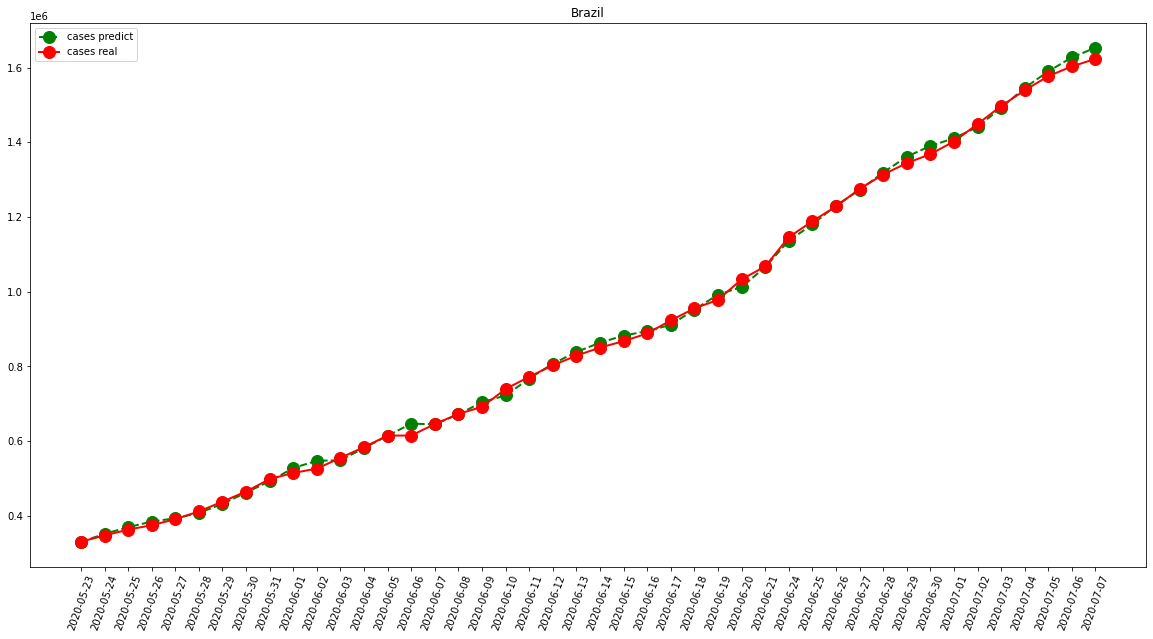

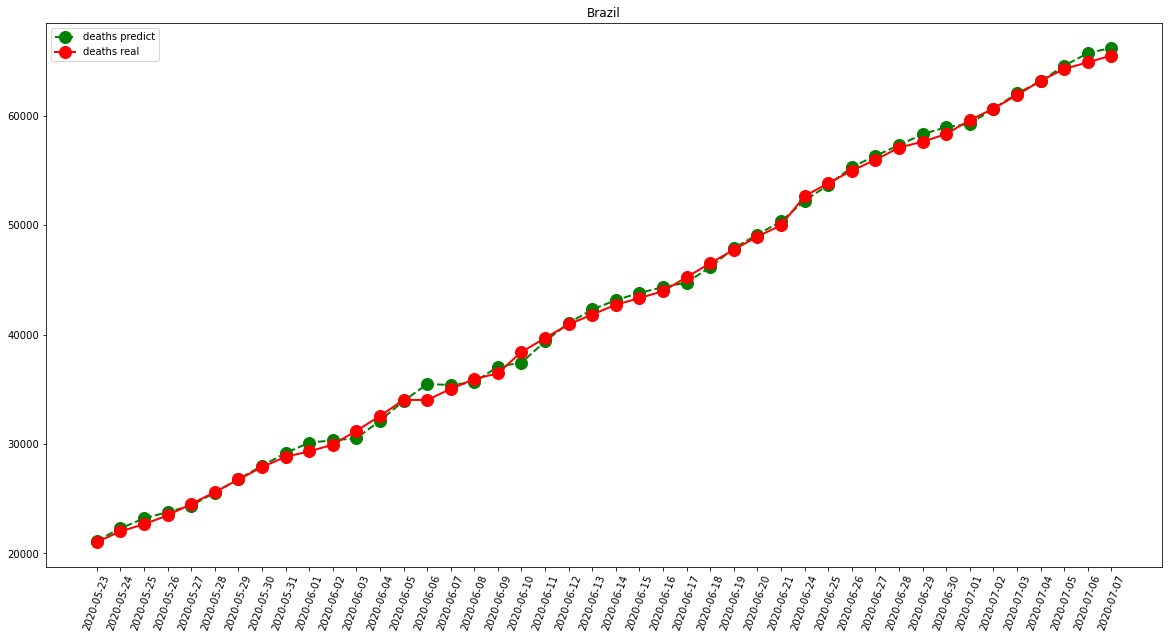

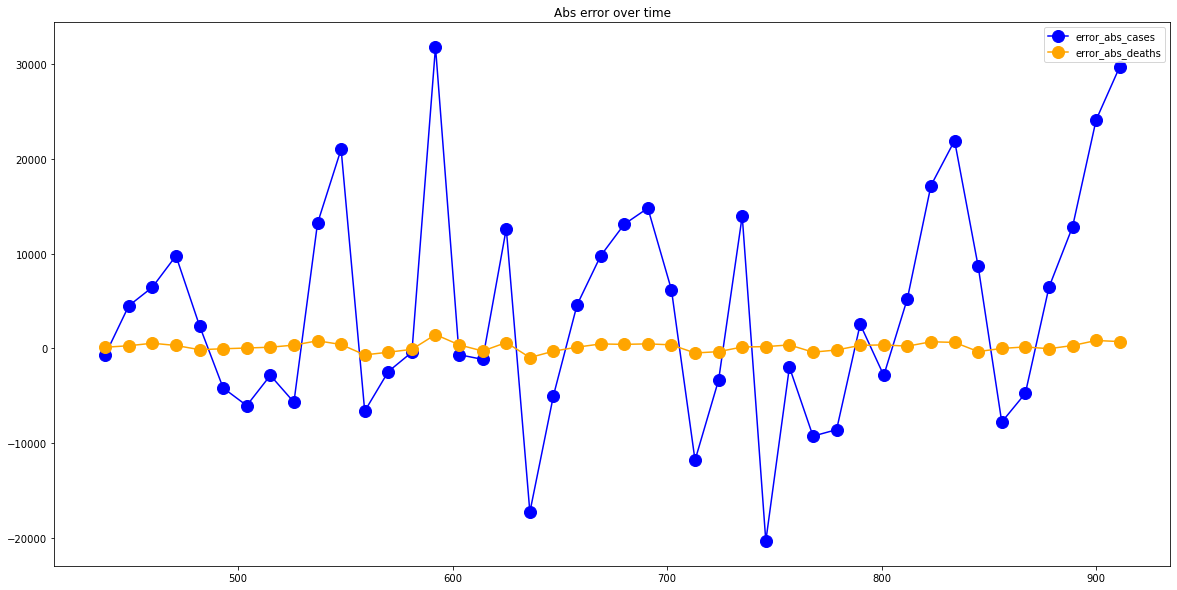

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)